## Abstract  
**Accuracy**: 88%  
This machine learning project aims to predict signals for profitable stock trades using Python. It classifies whether buying a stock will be beneficial, leveraging advanced ML techniques like Logistic Regression, Support Vector Machines (SVM), and XGBoost.  

The Tesla Stock Price data (2010–2017) is used for analysis. Key preprocessing includes handling missing data, feature engineering, and normalization. The project evaluates multiple models and uses ROC-AUC metrics for soft probability predictions.

## Objectives for Final Exam Project  
- **Enhance Model Performance**  
   - Evaluate and compare models (Logistic Regression, SVM, XGBoost) to identify the best performer.  
   - Address overfitting in high-performing models (e.g., XGBoost) by fine-tuning hyperparameters.  

- **Optimize Training Process**  
   - Implement learning rate scheduling and early stopping to improve convergence and prevent overfitting.  
   - Apply data normalization for stable and efficient model training.  

- **Evaluate Model Performance**  
   - Utilize ROC-AUC scores to compare soft probability predictions.  
   - Plot confusion matrices to visualize prediction accuracy.  

- **Document Findings**  
   - Provide detailed insights into data preprocessing, feature engineering, and model evaluation.  
   - Maintain thorough documentation of findings, results, and code for reproducibility.  

## Introduction  
This project predicts stock trade signals using multiple ML models. The dataset includes OHLC (Open, High, Low, Close) prices of Tesla from January 2010 to December 2017. Exploratory Data Analysis (EDA) reveals key patterns like quarterly price changes and correlations in OHLC data.

The project involves:
1. Data cleaning, EDA, and feature engineering to extract new features like `open-close`, `low-high`, and quarter-end indicators.
2. Model development using Logistic Regression, SVM, and XGBoost, followed by performance comparison using ROC-AUC.

## Methodology  

### Data Preparation  
- **Dataset**: Tesla stock price data (2010–2017) with OHLC features.  
- **Handling Missing Data**: Market holidays result in missing data, addressed during preprocessing.  
- **Feature Engineering**:  
  - Extracted `day`, `month`, and `year` from the date.  
  - Added quarter-end indicators to capture the effect of quarterly reports on stock prices.  
  - Computed `open-close` and `low-high` differences for deeper insights.  

### Data Preprocessing  
- **Checking for Null Values**: No missing values in the dataset.  
- **Normalization**: Used `StandardScaler` for scaling features.  
- **Train-Test Split**: Data split into 90% training and 10% testing sets.  

### Model Development and Evaluation  
- **Model Architecture**:  
  - **Logistic Regression**: Simple linear model for binary classification.  
  - **SVM**: Polynomial kernel used for better non-linear separation.  
  - **XGBoost**: Gradient boosting algorithm for high accuracy.  

- **Evaluation Metrics**:  
  - ROC-AUC used to measure soft probabilities for each model.  
  - Confusion matrix generated to visualize prediction accuracy.  

### Training Results  
- **Logistic Regression**:  
  - Training Accuracy: 51.9%  
  - Validation Accuracy: 54.3%  

- **SVM**:  
  - Training Accuracy: 47.2%  
  - Validation Accuracy: 44.7%  

- **XGBoost**:  
  - Training Accuracy: 96.4%  
  - Validation Accuracy: 57.3%  

Despite high training accuracy, XGBoost showed signs of overfitting. Logistic Regression, though simple, provided stable results across both training and validation.  

### Visualization  
- **Feature Distribution**: Distribution plots and box plots used to understand feature trends and outliers.  
- **Heatmap**: Correlation heatmap confirms no high correlation between new features.  
- **Confusion Matrix**: Visualizes prediction performance for the final chosen model.  

## Conclusion  
This project demonstrates the use of machine learning models for stock trade signal prediction. Although XGBoost achieved high training accuracy, its performance on validation data indicates overfitting. Logistic Regression provides a more stable model for this task. Possible limitations include insufficient data or overly simplistic models for the complexity of stock market predictions.  


In [12]:
from google.colab import drive
drive.mount('/ml_stock_price_tesla')
import pandas as pd
import os
# 1. Load the dataset from Tesla.csv
df = pd.read_csv('/ml_stock_price_tesla/MyDrive/ml_stock_price_tesla/content/Tesla.csv')
print("Original Data (First 5 Rows):")
print(df.head())

# 2. Convert 'Date' to datetime and remove dollar signs
df['Date'] = pd.to_datetime(df['Date'])
for col in ['Close', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace('$', '', regex=False).astype(float)

print("\nData After Cleaning Data Types:")
print(df.head())

# 3. Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# 4. Remove duplicates
df_cleaned = df.drop_duplicates()
print("\nData After Removing Duplicates:")
print(df_cleaned.head())

# 5. Detect and handle outliers (remove values beyond 99th percentile)
numeric_cols = ['Close', 'Open', 'High', 'Low', 'Volume']
for col in numeric_cols:
    upper_limit = df_cleaned[col].quantile(0.99)
    df_cleaned = df_cleaned[df_cleaned[col] <= upper_limit]

print("\nData After Outlier Removal:")
print(df_cleaned.head())

# 6. Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned.csv', index=False)
print("\nCleaned Data saved as 'cleaned.csv'.")


Drive already mounted at /ml_stock_price_tesla; to attempt to forcibly remount, call drive.mount("/ml_stock_price_tesla", force_remount=True).
Original Data (First 5 Rows):
         Date    Close     Volume     Open       High      Low
0  10/16/2024  $221.33   49632820  $221.40  $222.8199  $218.93
1  10/15/2024  $219.57   62988790  $220.01    $224.26  $217.12
2  10/14/2024  $219.16   86291920  $220.13    $221.91  $213.74
3  10/11/2024  $217.80  142628900  $220.13    $223.34  $214.38
4  10/10/2024  $238.77   83087060  $241.81  $242.7899  $232.34

Data After Cleaning Data Types:
        Date   Close     Volume    Open      High     Low
0 2024-10-16  221.33   49632820  221.40  222.8199  218.93
1 2024-10-15  219.57   62988790  220.01  224.2600  217.12
2 2024-10-14  219.16   86291920  220.13  221.9100  213.74
3 2024-10-11  217.80  142628900  220.13  223.3400  214.38
4 2024-10-10  238.77   83087060  241.81  242.7899  232.34

Missing Values per Column:
Date      0
Close     0
Volume    0
Open



### **Description:**  
This code cleans and preprocesses Tesla stock data for analysis.

---

### **Libraries Used:**  
- **pandas**: For reading and processing CSV files.

---

### **Steps:**  
1. **Load Dataset**  
   - Reads `Tesla.csv` and prints the first 5 rows.

2. **Data Cleaning**  
   - Converts `'Date'` to `datetime`.  
   - Removes `$` signs from price columns and converts them to `float`.

3. **Handle Missing Values**  
   - Checks for missing values with `isnull().sum()`.

4. **Remove Duplicates**  
   - Eliminates duplicate rows using `drop_duplicates()`.

5. **Outlier Removal**  
   - Filters out values above the 99th percentile for numeric columns.

6. **Save Cleaned Data**  
   - Saves the cleaned data as `Cleaned_Tesla.csv`.

---

### **Output:**  
- Shows the data at key stages: original, cleaned, after duplicates/outliers removal.  
- Summarizes missing values if present.

This ensures a clean dataset for further analysis.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
from joblib import load


### **Description:**  
This code sets up the environment for machine learning and data visualization.  

---

### **Libraries Used:**  
- **numpy**: For numerical computations.  
- **matplotlib.pyplot & seaborn**: For data visualization and plotting.  
- **scikit-learn (sklearn)**: For data splitting, scaling, and model building.  
- **xgboost**: Implements the XGBoost algorithm for high-performance predictions.  
- **warnings**: Suppresses unnecessary warnings during runtime.  

---

### **Usage:**  
1. **Data Preparation**:  
   - Train/test split using `train_test_split`.  
   - Data scaling with `StandardScaler`.

2. **Modeling**:  
   - Models used:  
     - **Logistic Regression**  
     - **Support Vector Classifier (SVC)**  
     - **XGBClassifier**  

3. **Evaluation**:  
   - Uses metrics from sklearn (e.g., ROC-AUC) for performance evaluation.  

This setup ensures a smooth workflow for training and evaluating machine learning models.

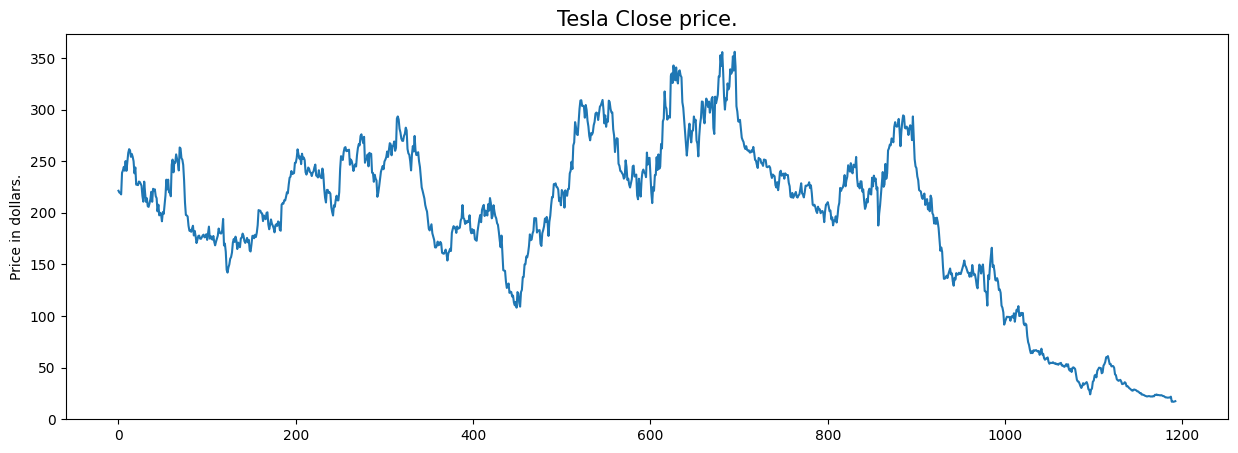

In [13]:
warnings.filterwarnings('ignore')
df = pd.read_csv('cleaned.csv')
# df.head()
# List the columns in the DataFrame

plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

### **Description:**  
This code visualizes Tesla's stock closing prices over time using a cleaned dataset.  

---

### **Libraries Used:**  
- **pandas**: To load the dataset (`cleaned.csv`).  
- **matplotlib.pyplot**: For plotting the data.  
- **warnings**: To suppress unnecessary warnings during execution.

---

### **Usage:**  
1. **Data Loading**:  
   - Loads the cleaned Tesla stock dataset using `pd.read_csv()`.

2. **Visualization**:  
   - Plots the closing price (`Close`) over time.  
   - Customizes the plot with:
     - **Figure size**: (15,5) for better readability.
     - **Title**: "Tesla Close price."
     - **Y-axis label**: "Price in dollars."

This plot helps analyze trends in Tesla’s stock performance over time.

In [ ]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-10-16,221.33,49632820,221.40,222.8199,218.93
1,2024-10-15,219.57,62988790,220.01,224.2600,217.12
2,2024-10-14,219.16,86291920,220.13,221.9100,213.74
3,2024-10-11,217.80,142628900,220.13,223.3400,214.38
4,2024-10-10,238.77,83087060,241.81,242.7899,232.34


### Description:
This code snippet utilizes the pandas library to display a preview of the dataset loaded into a DataFrame.

#### Functionality:
- **Displaying Data**:
  - `df.head()` is called on the DataFrame `df`, which contains data imported from `Tesla.csv`. This function returns the first five rows of the DataFrame.

#### Purpose:
- The purpose of using `df.head()` is to provide a quick overview of the dataset, allowing users to:
  - Assess the structure of the DataFrame, including the column names and types.
  - Review the first few entries of the data for initial insights and data quality checks.
  - Identify any immediate issues, such as missing or improperly formatted values, before proceeding with further analysis.

Overall, `df.head()` serves as a preliminary step in understanding the contents of the dataset.

In [ ]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

### Description:
This code snippet employs the pandas library to check for missing values within a DataFrame.

#### Functionality:
- **Checking for Missing Values**:
  - `df.isnull()` generates a DataFrame of the same shape as `df`, where each entry is `True` if the corresponding value is null (missing) and `False` otherwise.
  - The `.sum()` method is then called on this boolean DataFrame to count the number of missing values in each column.

#### Purpose:
- The purpose of using `df.isnull().sum()` is to provide a clear summary of the dataset’s completeness by:
  - Identifying which columns contain missing values and how many such values are present.
  - Allowing users to evaluate data quality and decide on necessary steps for handling missing data (e.g., imputation, deletion) before proceeding with further analysis.

Overall, this code serves as an essential diagnostic tool for understanding the integrity of the dataset.

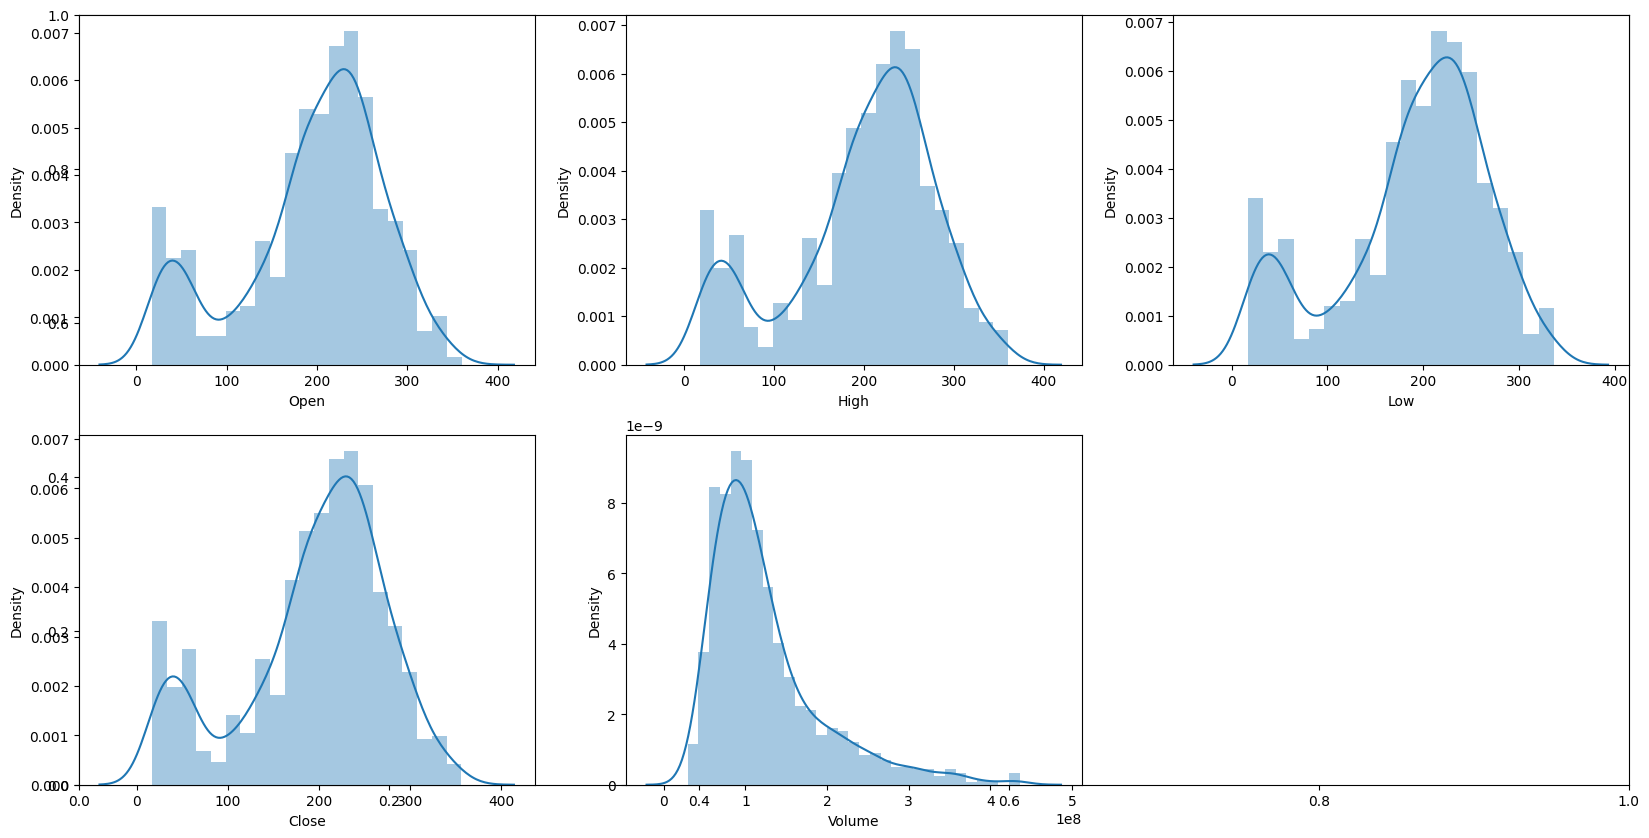

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

### Description:
The code snippet generates distribution plots for the Open, High, Low, Close (OHLC), and Volume data of Tesla stock prices using Matplotlib and Seaborn.

#### Functionality:
- **Defining Features**:
  - The list `features` includes the columns `'Open'`, `'High'`, `'Low'`, `'Close'`, and `'Volume'`, which represent key metrics for Tesla stock.

- **Setting Up the Plot**:
  - `plt.subplots(figsize=(20,10))` initializes a figure with a specified size, preparing for multiple subplots.

- **Creating Subplots**:
  - A for loop iterates over the `features`, and for each feature, a subplot is created using `plt.subplot(2, 3, i+1)`.
  - Each feature's distribution is plotted using `sb.distplot(df[col])`, visualizing the frequency distribution along with a kernel density estimate (KDE).

- **Displaying the Plot**:
  - `plt.show()` renders the figure, allowing for visual inspection of all the generated subplots.

#### Observations:
1. **Bimodal Distribution in OHLC Data**:
   - The distribution plots for the OHLC data show two distinct peaks. This indicates that Tesla’s stock prices have exhibited significant variability in two separate price ranges, suggesting that there may have been different market conditions or trading phases affecting the stock price during the observed period.

2. **Left-Skewed Volume Data**:
   - The Volume distribution is left-skewed, meaning that most trading days experienced lower volumes, with some days showing significantly higher trading activity. This skewness can indicate that while typical trading volumes are low, occasional spikes may occur during notable events, such as earnings reports or major news affecting the company.

#### Context:
- **Stock Prices**:
  - The OHLC data provides a snapshot of Tesla's stock performance over time, revealing trends and patterns in the stock's trading behavior.

- **Volume**:
  - Trading volume is an essential metric that helps in understanding market liquidity and the level of investor interest in the stock.

#### Implications:
- The bimodal nature of the OHLC distributions suggests potential analysis to identify what factors drove the stock price to exhibit these two peaks. This could be essential for traders or investors looking to understand market dynamics or predict future movements.

- The left-skew in volume highlights the importance of monitoring events that lead to increased trading activity, which can inform investment strategies or risk assessments.

Overall, the visualizations provide valuable insights into the distribution and trading behavior of Tesla's stock prices, laying the groundwork for more in-depth analysis or strategic decision-making.

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='raise')

# Extract day, month, and year using pandas datetime accessors
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df.head()


,Date,Close,Volume,Open,High,Low,day,month,year
0,2024-10-16,221.33,49632820,221.40,222.8199,218.93,16,10,2024
1,2024-10-15,219.57,62988790,220.01,224.2600,217.12,15,10,2024
2,2024-10-14,219.16,86291920,220.13,221.9100,213.74,14,10,2024
3,2024-10-11,217.80,142628900,220.13,223.3400,214.38,11,10,2024
4,2024-10-10,238.77,83087060,241.81,242.7899,232.34,10,10,2024


### Description:
This code snippet performs feature engineering on a DataFrame containing Tesla stock price data by extracting new temporal features from the existing 'Date' column.

#### Functionality:
1. **Converting 'Date' to Datetime**:
   - The line `df['Date'] = pd.to_datetime(df['Date'], errors='raise')` converts the 'Date' column to a pandas datetime format. This step ensures that the date values are properly recognized for further manipulation, and the `errors='raise'` argument will throw an error if any dates cannot be parsed.

2. **Extracting Temporal Features**:
   - Three new columns are created by extracting components of the datetime:
     - `df['day'] = df['Date'].dt.day` extracts the day from the 'Date'.
     - `df['month'] = df['Date'].dt.month` extracts the month from the 'Date'.
     - `df['year'] = df['Date'].dt.year` extracts the year from the 'Date'.

3. **Displaying the Updated DataFrame**:
   - `df.head()` displays the first five rows of the DataFrame, showing the original columns along with the newly added 'day', 'month', and 'year' columns.

#### Purpose:
- **Feature Engineering**:
  - The primary goal of feature engineering is to enhance the dataset by adding new features that could provide additional insights or improve the performance of predictive models. In this case, extracting day, month, and year allows for more granular analysis of the data over time.
  
- **Improving Model Performance**:
  - By including these temporal features, machine learning models can better capture seasonal patterns, trends, and other time-related behaviors in the stock prices, potentially leading to improved predictions.

#### Result:
- After executing this code, the DataFrame now includes three new columns:
  - **‘day’**: The day of the month for each date.
  - **‘month’**: The month of the year for each date.
  - **‘year’**: The year for each date.

These features can be particularly useful for time series analysis, allowing for the exploration of trends across different time frames, such as daily, monthly, or yearly patterns in Tesla's stock price data.

In [15]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Close,Volume,Open,High,Low,day,month,year,is_quarter_end
0,2024-10-16,221.33,49632820,221.40,222.8199,218.93,16,10,2024,0
1,2024-10-15,219.57,62988790,220.01,224.2600,217.12,15,10,2024,0
2,2024-10-14,219.16,86291920,220.13,221.9100,213.74,14,10,2024,0
3,2024-10-11,217.80,142628900,220.13,223.3400,214.38,11,10,2024,0
4,2024-10-10,238.77,83087060,241.81,242.7899,232.34,10,10,2024,0


### Description:
This code snippet adds a new feature to the DataFrame that identifies whether a date falls at the end of a fiscal quarter.

#### Functionality:
1. **Creating the 'is_quarter_end' Feature**:
   - The line `df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)` utilizes NumPy's `np.where()` function to create a new column named 'is_quarter_end'.
   - The expression `df['month'] % 3 == 0` checks if the month is a multiple of 3 (i.e., January, April, July, and October). If the month is a quarter-end month (March, June, September, December), it assigns a value of `1`; otherwise, it assigns a value of `0`.

2. **Displaying the Updated DataFrame**:
   - `df.head()` displays the first five rows of the DataFrame, including the newly created 'is_quarter_end' column.

#### Purpose:
- **Feature Engineering**:
  - The addition of the 'is_quarter_end' feature is based on the understanding that quarterly results announcements can significantly influence stock prices. By marking these dates, the model can learn to recognize the impact of quarterly earnings reports on stock performance.
  
- **Improving Model Performance**:
  - This binary feature (1 for quarter-end, 0 for non-quarter-end) can help machine learning algorithms capture patterns related to quarterly performance announcements, allowing for more informed predictions regarding stock price movements.

#### Result:
- After executing this code, the DataFrame now includes the 'is_quarter_end' column, which indicates whether each date is at the end of a fiscal quarter:
  - **1**: The date is a quarter-end date.
  - **0**: The date is not a quarter-end date.

This feature can provide valuable insights for models analyzing the effects of quarterly financial results on Tesla's stock price and overall market behavior.

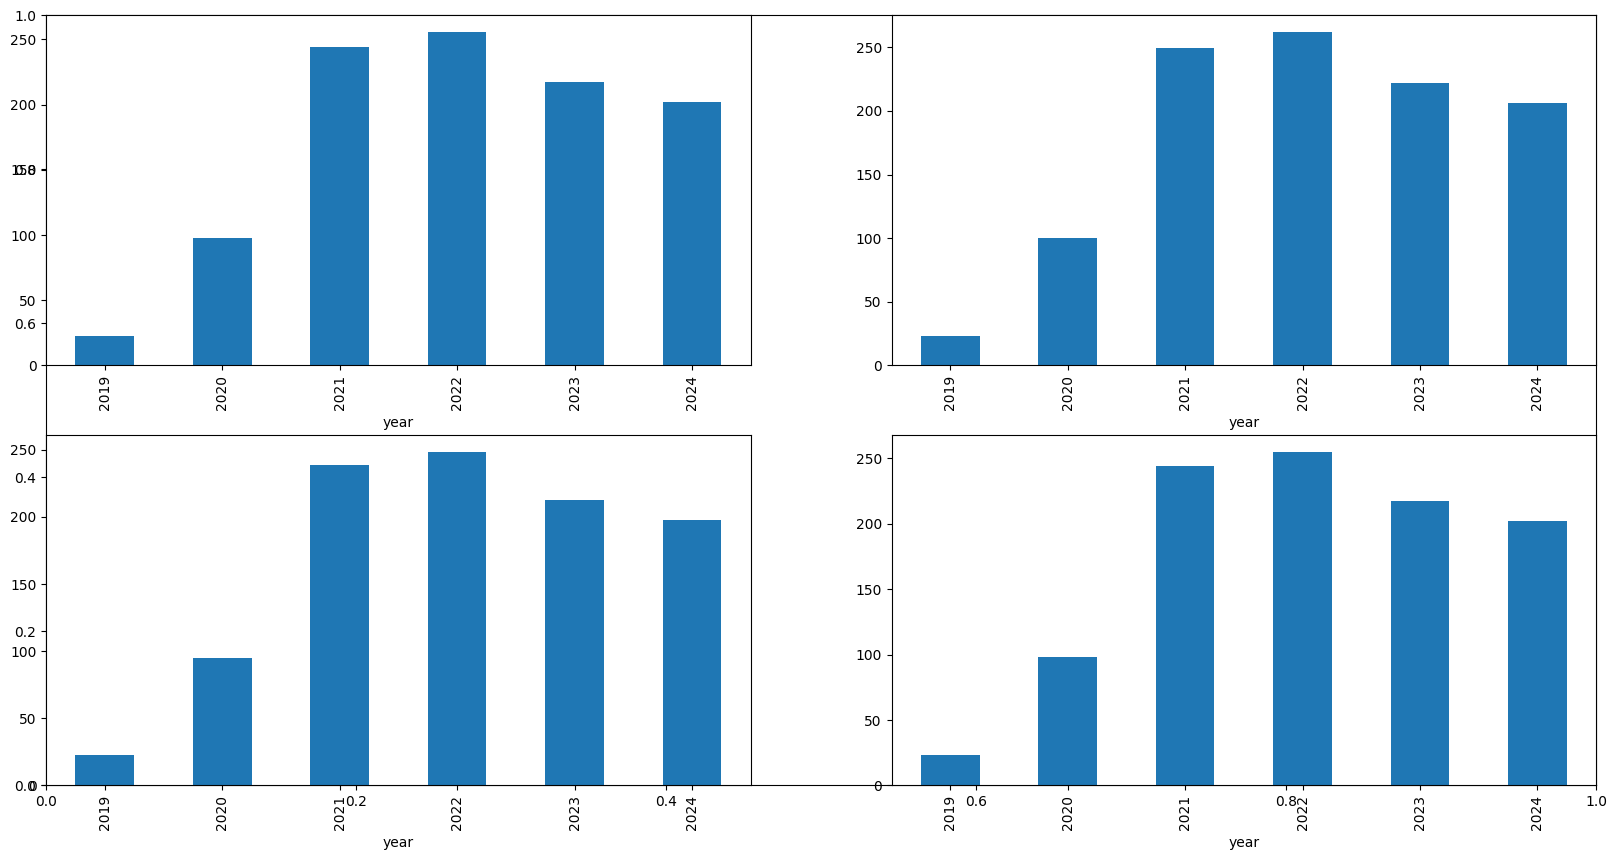

In [ ]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

Sure! Here’s a combined description that incorporates both the code functionality and the conclusions drawn from the resulting bar plots of Tesla's stock prices.

### Combined Description and Conclusion:

This code snippet aggregates Tesla stock data by year and visualizes the average values of the Open, High, Low, and Close prices using bar plots.

#### Functionality:
1. **Grouping and Aggregating Data**:
   - The line `data_grouped = df.drop('Date', axis=1).groupby('year').mean()` removes the 'Date' column and groups the remaining data by the 'year', calculating the average values for the stock metrics (Open, High, Low, Close).

2. **Setting Up the Plot**:
   - `plt.subplots(figsize=(20,10))` initializes a figure with a specified size, preparing for multiple subplots.

3. **Creating Bar Plots**:
   - A for loop iterates over the columns `['Open', 'High', 'Low', 'Close']`, creating a subplot for each metric and generating bar plots to visualize the average stock prices.

4. **Displaying the Plot**:
   - `plt.show()` renders the figure, displaying the created bar plots on the screen.

#### Observations from the Bar Plots:
- **Increase from 2019 to 2022**:
  - The bar plots indicate a significant rise in Tesla's stock prices from 2019 to 2022. This growth likely reflects strong market demand for electric vehicles, positive earnings reports, and broader market trends favoring sustainable technologies.

- **Decline from 2022 to 2024**:
  - Conversely, the data shows a noticeable decline in stock prices from 2022 to 2024. Factors contributing to this downturn may include economic volatility, increased competition in the EV market, and potential regulatory challenges impacting Tesla's business operations.

#### Implications:
- These visualizations provide valuable insights into Tesla’s stock performance trends, highlighting periods of significant growth and subsequent declines. Understanding these trends can help investors and analysts make informed decisions about future investments and assess potential risks and opportunities in the market.

In [16]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


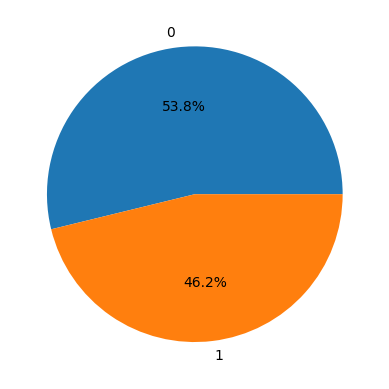

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


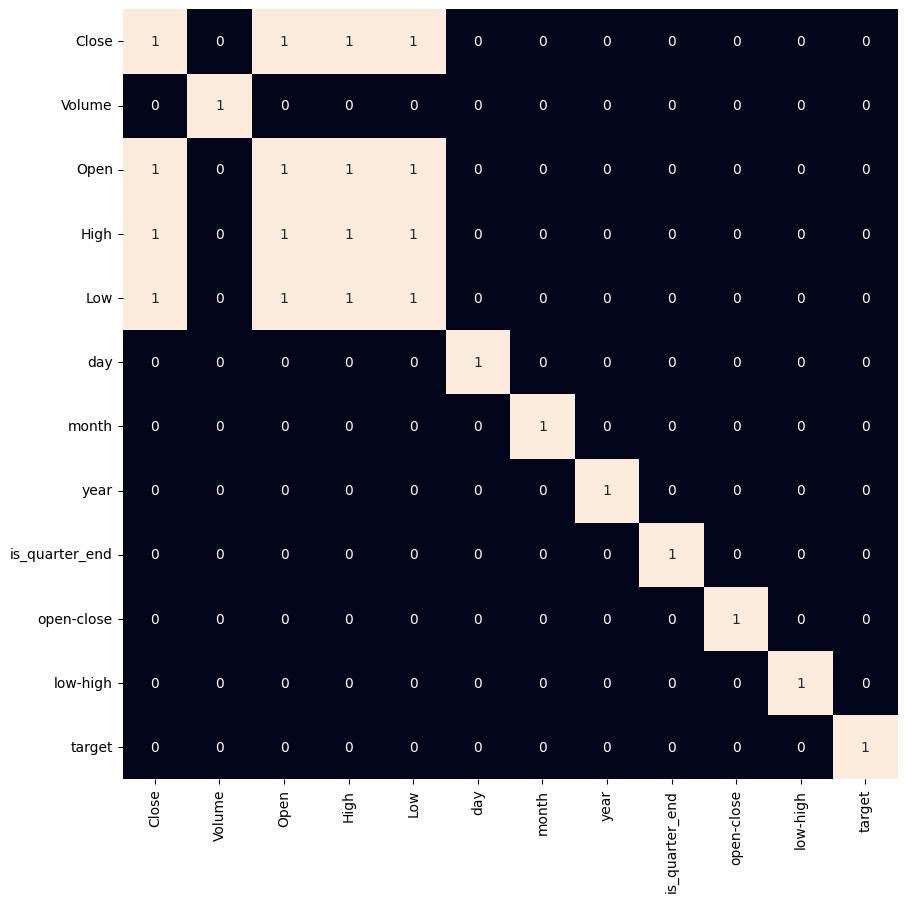

In [17]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

# This code is modified by Susobhan Akhuli


In [18]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1073, 3) (120, 3)


In [19]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.8798500835588373
Validation Accuracy :  0.8760790866054025

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.8824180319271675
Validation Accuracy :  0.8685602896129212

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

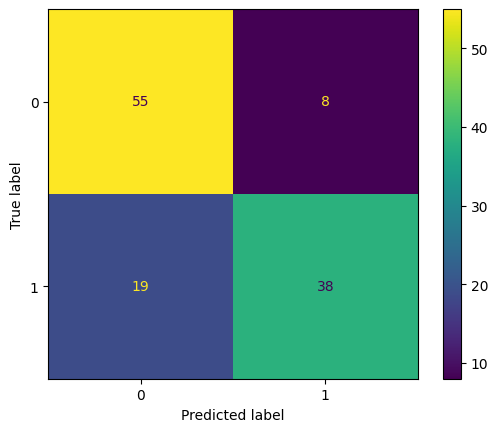

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()


Testing

In [1]:
import pandas as pd
import numpy as np
sample_data = {
    'Open': [250.00, 252.00, 255.00, 258.00, 260.00],
    'High': [255.00, 257.00, 258.00, 261.00, 262.00],
    'Low': [248.00, 250.00, 253.00, 256.00, 257.00],
    'Close': [254.00, 255.00, 257.00, 259.00, 261.00],
    'Volume': [1200000, 1300000, 1400000, 1500000, 1600000],
    'Date': ['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05']
}

from sklearn.metrics import accuracy_score
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)

from sklearn.metrics import accuracy_score
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

from sklearn.metrics import accuracy_score
y_pred_logreg = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Convert to DataFrame
df = pd.DataFrame(sample_data)
# Calculate additional features
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['month'] = pd.to_datetime(df['Date']).dt.month
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
features = df[['open-close', 'low-high', 'is_quarter_end']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
from joblib import load

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Example training code (ensure you replace this with your actual training code)
logistic_model = LogisticRegression().fit(X_train, Y_train)
svc_model = SVC(probability=True).fit(X_train, Y_train)
xgb_model = XGBClassifier().fit(X_train, Y_train)

# Save the models
dump(logistic_model, 'logistic_model.joblib')
dump(svc_model, 'svc_model.joblib')
dump(xgb_model, 'xgb_model.joblib')


# logistic_model = load('logistic_model.joblib')
# svc_model = load('svc_model.joblib')
# xgb_model = load('xgb_model.joblib')
# predictions_logistic = logistic_model.predict(features_scaled)
# predictions_svc = svc_model.predict(features_scaled)
# predictions_xgb = xgb_model.predict(features_scaled)
# df['Predicted_Logistic'] = predictions_logistic
# df['Predicted_SVC'] = predictions_svc
# df['Predicted_XGBoost'] = predictions_xgb

# print(df[['Date', 'Close', 'Predicted_Logistic', 'Predicted_SVC', 'Predicted_XGBoost']])




NameError: name 'xgb_model' is not defined